# Addestramento 1

In [3]:
import tensorflow as tf
from keras.legacy_tf_layers.convolutional import Conv1D
from tensorflow import keras
import pandas as pd
!pip install d2l==1.0.0a1.post0
from d2l import tensorflow as d2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
model = keras.models.Sequential([
keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="valid", input_shape=[300, 1]),
keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="valid"),
keras.layers.MaxPooling1D(pool_size=2, strides=2),
keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="valid"),
keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="valid"),
keras.layers.MaxPooling1D(pool_size=2, strides=2),
keras.layers.Flatten(),
keras.layers.Dense(256, activation=tf.nn.relu),
keras.layers.Dense(128, activation=tf.nn.relu),
keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 296, 64)           384       
                                                                 
 conv1d_1 (Conv1D)           (None, 292, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 146, 64)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 144, 128)          24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 142, 128)          49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 71, 128)          0         
 1D)                                                    

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

test_error_rate = model.evaluate(x_test, y_test, verbose=0)

NameError: name 'x_train' is not defined

# Addestramento 2

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model



input_tot = Input(shape=(251, 1), name ="Input_tot")

# Pipeline 1
branch1_1 = keras.layers.Conv1D(filters=8, kernel_size=4, activation='relu', name ="branch1_1")(input_tot)
branch1_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch1_2")(branch1_1)
branch1_3 = keras.layers.Conv1D(filters=24, kernel_size=6, activation='relu', name ="branch1_3")(branch1_2)
branch1_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch1_4")(branch1_3)

# Pipeline 2
branch2_1 = keras.layers.Conv1D(filters=8, kernel_size=6, activation='relu', name ="branch2_1")(input_tot)
branch2_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch2_2")(branch2_1)
branch2_3 = keras.layers.Conv1D(filters=24, kernel_size=8, activation='relu', name ="branch2_3")(branch2_2)
branch2_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch2_4")(branch2_3)

# Pipeline 3
branch3_1 = keras.layers.Conv1D(filters=8, kernel_size=8, activation='relu', name ="branch3_1")(input_tot)
branch3_2 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch3_2")(branch3_1)
branch3_3 = keras.layers.Conv1D(filters=24, kernel_size=10, activation='relu', name ="branch3_3")(branch3_2)
branch3_4 = keras.layers.MaxPooling1D(pool_size=2, strides=2, name ="branch3_4")(branch3_3)

#Merging tre pipeline
branch_concatenate = concatenate([branch1_4,branch2_4,branch3_4], axis=1, name="concatenated_layer")

#Final Layer
dense1 = Dense(256, activation = "sigmoid", name = "dense1")(branch_concatenate)
dense2 = Dense(32, activation = "sigmoid", name = "dense2")(dense1)
output_layer = Dense(4, activation = "sigmoid", name = "output_layer")(dense2)

#Model Definition
merged = Model(inputs=[input_tot],outputs=[output_layer], name = "merged model")

#Model Details
merged.summary()
keras.utils.plot_model(merged, "output/architecture.png", show_shapes=True)

C:\Users\andre\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Model: "merged model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_tot (InputLayer)         [(None, 251, 1)]     0           []                               
                                                                                                  
 branch1_1 (Conv1D)             (None, 248, 8)       40          ['Input_tot[0][0]']              
                                                                                                  
 branch2_1 (Conv1D)             (None, 246, 8)       56          ['Input_tot[0][0]']              
                                                                                                  
 branch3_1 (Conv1D)             (None, 244, 8)       72          ['Input_tot[0][0]']              
                                                                                       

In [8]:
df = pd.read_csv('heartbeats/heartbeats_datasets.csv')

df.head(1)

,signal,annotypes
0,[-0.265 -0.27 -0.265 -0.26 -0.275 -0.28 -0....,N


# Addestramento 3

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [48]:
input = (251, 1)
model = create_lstm_model(input, 2)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 251, 128)          66560     
                                                                 
 dropout_4 (Dropout)         (None, 251, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 198,402
Trainable params: 198,402
Non-trainable params: 0
_________________________________________________________________


# Addestramento 4

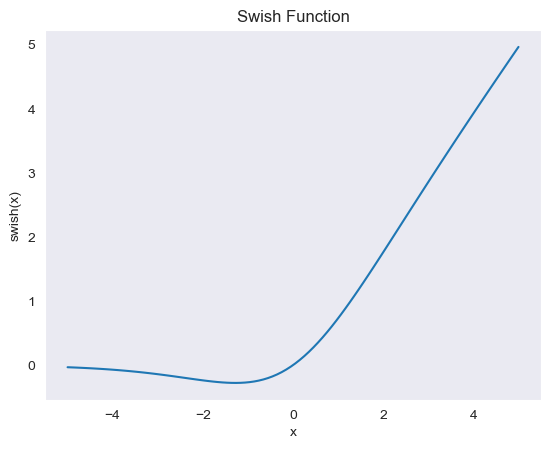

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

x = np.linspace(-5, 5, 100)

def swish(x):
    return x * K.sigmoid(x)

y = swish(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('swish(x)')
plt.title('Swish Function')
plt.grid()
plt.show()

In [59]:
from keras.layers import Input, Conv1D, BatchNormalization, Activation, MaxPooling1D, LSTM, GlobalAveragePooling1D, Dense, Reshape
from keras.models import Model

def create_model(input_shape, n_classes):
    inputs = Input(shape=input_shape)

    x = Conv1D(32, kernel_size=3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    x = Conv1D(64, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    x = Conv1D(128, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    print(x)



    x = LSTM(128, return_sequences=True, go_backwards=False, dropout=0.5)(x)
    x = LSTM(128, return_sequences=False, go_backwards=True, dropout=0.5)(x)

    x = Reshape((-1, 128))(x)

    x = GlobalAveragePooling1D()(x)

    outputs = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model


In [60]:
input = (251, 1)
model = create_model(input, 2)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 126, 128), dtype=tf.float32, name=None), name='max_pooling1d_5/Squeeze:0', description="created by layer 'max_pooling1d_5'")
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 251, 1)]          0         
                                                                 
 conv1d_19 (Conv1D)          (None, 251, 32)           128       
                                                                 
 batch_normalization_15 (Bat  (None, 251, 32)          128       
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 251, 32)           0         
                                                                 
 conv1d_20 (Conv1D)          (None, 251, 64)           6208      
                    

# Addestramento 5 (Autoencoders)
## Vedere anche:
## https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# Dimensione dell'input (lunghezza del segnale ECG)
input_dim = 300

# Definire l'encoder
input_data = Input(shape=(input_dim,))
encoded = Dense(100, activation='relu')(input_data)
encoded = Dense(50, activation='relu')(encoded)
# Definire il decoder
decoded = Dense(100, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Creare l'autoencoder
autoencoder = Model(input_data, decoded)

# Compilare l'autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Addestrare l'autoencoder sui dati di input
# autoencoder.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Utilizzare l'encoder per ottenere la rappresentazione codificata dei dati di input
encoder = Model(input_data, encoded)
encoded_input = encoder.predict(X_train)
encoded_test = encoder.predict(X_test)

# print(encoded_input)
# print(type(encoded_input))
# print(len(encoded_input))
# print(len(encoded_input[0]))

encoded_dim = 50
num_classes = 2

# Utilizzare la rappresentazione codificata come input per la classificazione
input_data = Input(shape=(encoded_dim,))
classification = Dense(100, activation='relu')(input_data)
classification = Dense(50, activation='relu')(classification)
classification = Dense(num_classes, activation='softmax')(classification)
classifier = Model(input_data, classification)

# Compilare la rete neurale classificatrice
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Addestrare la rete neurale classificatrice sulla rappresentazione codificata
classifier.fit(encoded_input, y_train, epochs=3, batch_size=64, validation_data=(encoded_test, y_test))

### Qui sotto è definito l'autoencoder per vedere i suoi parametri per ogni livello e generali

In [3]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# Dimensione dell'input (lunghezza del segnale ECG)
input_dim = 300

# Definire l'encoder
input_data = Input(shape=(input_dim,))
encoded = Dense(100, activation='relu')(input_data)
encoded = Dense(50, activation='relu')(encoded)
# Definire il decoder
decoded = Dense(100, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Creare l'autoencoder
autoencoder = Model(input_data, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 100)               5100      
                                                                 
 dense_11 (Dense)            (None, 300)               30300     
                                                                 
Total params: 70,550
Trainable params: 70,550
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilare l'autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Addestrare l'autoencoder sui dati di input
autoencoder.fit(X_train, y_train, epochs=3, batch_size=32)
# DA VERIFICARE SE UTILIZZARE ANCHE IL VALIDATION_DATA
# autoencoder.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, x_test))

In [2]:
# Utilizzare l'encoder per ottenere la rappresentazione codificata dei dati di input
encoder = Model(input_data, encoded)
encoded_input = encoder.predict(X_train)

# Utilizzare la rappresentazione codificata come input per la classificazione
input_data = Input(shape=(encoded_dim,))
classification = Dense(100, activation='relu')(input_data)
classification = Dense(50, activation='relu')(classification)
classification = Dense(num_classes, activation='softmax')(classification)
classifier = Model(input_data, classification)

# Compilare la rete neurale classificatrice
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Addestrare la rete neurale classificatrice sulla rappresentazione codificata
classifier.fit(encoded_input, y_train, epochs=50, batch_size=32, validation_data=(encoded_test, y_test))


NameError: name 'X_train' is not defined

# DBN

#### Deep Belief Networks (DBN) - Le DBN sono composte da più strati di unità nascoste, che sono utilizzati per l'estrazione di caratteristiche del segnale. Possono essere utilizzate per la classificazione delle aritmie e per la predizione della mortalità a breve termine

In [14]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Definisci l'architettura del DBN
visible = Input(shape=(300,))
hidden1 = Dense(256, activation='relu')(visible)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden2)
hidden3 = Dense(64, activation='relu')(dropout2)
dropout3 = Dropout(0.2)(hidden3)
output = Dense(2, activation='softmax')(dropout3)

# Crea il modello del DBN
model = Model(inputs=visible, outputs=output)

# Compila il modello
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
# Addestra il modello
# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# Valuta il modello
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print('Test accuracy:', test_acc)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense_7 (Dense)             (None, 256)               77056     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0   

# GAN

In [4]:
# Import delle librerie
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding1D, UpSampling1D, Conv1D, LeakyReLU

from keras.optimizers import Adam

# Definizione del generatore
def build_generator():

    noise_shape = (100,)

    model = Sequential()

    model.add(Dense(128 * 16, activation="relu", input_shape=noise_shape))
    model.add(Reshape((128, 16)))
    model.add(UpSampling1D())
    model.add(Conv1D(64, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling1D())
    model.add(Conv1D(32, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Conv1D(1, kernel_size=4, padding="same"))
    model.add(Activation("tanh"))

    noise = Input(shape=noise_shape)
    signal = model(noise)

    return Model(noise, signal)

# Definizione del discriminatore
def build_discriminator():

    signal_shape = (128, 1)

    model = Sequential()

    model.add(Conv1D(32, kernel_size=4, strides=2, input_shape=signal_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(64, kernel_size=4, strides=2, padding="same"))
    model.add(ZeroPadding1D(padding=(0, 1)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(128, kernel_size=4, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(256, kernel_size=4, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    signal = Input(shape=signal_shape)
    validity = model(signal)

    return Model(signal, validity)

# Compilazione della GAN
def build_gan(generator, discriminator):

    discriminator.trainable = False

    noise = Input(shape=(100,))
    signal = generator(noise)
    validity = discriminator(signal)


In [7]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [8]:
net_G = tf.keras.layers.Dense(2)

In [9]:
net_D = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation="tanh", input_shape=(2,)),
    tf.keras.layers.Dense(3, activation="tanh"),
    tf.keras.layers.Dense(1)
])

In [10]:
#@save
def update_D(X, Z, net_D, net_G, loss, optimizer_D):
    """Update discriminator."""
    batch_size = X.shape[0]
    ones = tf.ones((batch_size,)) # Labels corresponding to real data
    zeros = tf.zeros((batch_size,)) # Labels corresponding to fake data
    # Do not need to compute gradient for `net_G`, so it is outside GradientTape
    fake_X = net_G(Z)
    with tf.GradientTape() as tape:
        real_Y = net_D(X)
        fake_Y = net_D(fake_X)
        # We multiply the loss by batch_size to match PyTorch's BCEWithLogitsLoss
        loss_D = (loss(ones, tf.squeeze(real_Y)) + loss(
            zeros, tf.squeeze(fake_Y))) * batch_size / 2
    grads_D = tape.gradient(loss_D, net_D.trainable_variables)
    optimizer_D.apply_gradients(zip(grads_D, net_D.trainable_variables))
    return loss_D

In [11]:
#@save
def update_G(Z, net_D, net_G, loss, optimizer_G):
    """Update generator."""
    batch_size = Z.shape[0]
    ones = tf.ones((batch_size,))
    with tf.GradientTape() as tape:
        # We could reuse `fake_X` from `update_D` to save computation
        fake_X = net_G(Z)
        # Recomputing `fake_Y` is needed since `net_D` is changed
        fake_Y = net_D(fake_X)
        # We multiply the loss by batch_size to match PyTorch's BCEWithLogits loss
        loss_G = loss(ones, tf.squeeze(fake_Y)) * batch_size
    grads_G = tape.gradient(loss_G, net_G.trainable_variables)
    optimizer_G.apply_gradients(zip(grads_G, net_G.trainable_variables))
    return loss_G

In [12]:
def train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G, latent_dim, data):
    loss = tf.keras.losses.BinaryCrossentropy(
        from_logits=True, reduction=tf.keras.losses.Reduction.SUM)
    for w in net_D.trainable_variables:
        w.assign(tf.random.normal(mean=0, stddev=0.02, shape=w.shape))
    for w in net_G.trainable_variables:
        w.assign(tf.random.normal(mean=0, stddev=0.02, shape=w.shape))
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_D)
    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_G)
    animator = d2l.Animator(
        xlabel="epoch", ylabel="loss", xlim=[1, num_epochs], nrows=2,
        figsize=(5, 5), legend=["discriminator", "generator"])
    animator.fig.subplots_adjust(hspace=0.3)
    for epoch in range(num_epochs):
        # Train one epoch
        timer = d2l.Timer()
        metric = d2l.Accumulator(3)  # loss_D, loss_G, num_examples
        for (X,) in data_iter:
            batch_size = X.shape[0]
            Z = tf.random.normal(
                mean=0, stddev=1, shape=(batch_size, latent_dim))
            metric.add(update_D(X, Z, net_D, net_G, loss, optimizer_D),
                       update_G(Z, net_D, net_G, loss, optimizer_G),
                       batch_size)
        # Visualize generated examples
        Z = tf.random.normal(mean=0, stddev=1, shape=(100, latent_dim))
        fake_X = net_G(Z)
        animator.axes[1].cla()
        animator.axes[1].scatter(data[:, 0], data[:, 1])
        animator.axes[1].scatter(fake_X[:, 0], fake_X[:, 1])
        animator.axes[1].legend(["real", "generated"])

        # Show the losses
        loss_D, loss_G = metric[0] / metric[2], metric[1] / metric[2]
        animator.add(epoch + 1, (loss_D, loss_G))

    print(f'loss_D {loss_D:.3f}, loss_G {loss_G:.3f}, '
          f'{metric[2] / timer.stop():.1f} examples/sec')

In [ ]:
lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 20
train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G,
      latent_dim, data[:100].numpy())

# Rete con utilizzo di sincnet

In [25]:
from astroid import Lambda
import numpy as np
import keras.backend as K
from keras.layers import Lambda
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Model
from keras.utils import to_categorical

def sinc(band, x):
    return K.sinc(band * (x - (K.pi / 2) / band))

def sinc_layer(band):
    def func(x):
        return sinc(band, x)
    return Lambda(func)

def build_sinc_net(num_filters, kernel_size, pool_size, num_classes):
    # Numero di classi da classificare
    num_classes = 5

    # Dati di input e target
    x_train = np.random.rand(1000, 300, 1)
    y_train = to_categorical(np.random.randint(0, num_classes, 1000), num_classes)
    x_test = np.random.rand(100, 300, 1)
    y_test = to_categorical(np.random.randint(0, num_classes, 100), num_classes)

    # Definire l'input
    input_data = Input(shape=(300, 1))

    # Definire le convolutional layer
    conv_1 = Conv1D(num_filters, kernel_size, activation=sinc_layer(kernel_size), padding="same")(input_data)
    pool_1 = MaxPooling1D(pool_size)(conv_1)
    conv_2 = Conv1D(num_filters, kernel_size, activation=sinc_layer(kernel_size), padding="same")(pool_1)
    pool_2 = MaxPooling1D(pool_size)(conv_2)

    # Definire la fully connected layer
    flat = Flatten()(pool_2)
    dense = Dense(100, activation='relu')(flat)
    output = Dense(num_classes, activation='softmax')(dense)

    # Creare il modello SincNet
    sinc_net = Model(input_data, output)

    # Compilare il modello SincNet
    sinc_net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Addestrare il modello SincNet sui dati di input
    sinc_net.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

    return sinc_net


In [26]:
sinc_net = build_sinc_net(32, 3, 2, 2)
sinc_net.summary()

AttributeError: Exception encountered when calling layer "lambda_4" "                 f"(type Lambda).

module 'keras.backend' has no attribute 'sinc'

Call arguments received by layer "lambda_4" "                 f"(type Lambda):
  • inputs=tf.Tensor(shape=(None, 300, 32), dtype=float32)
  • mask=None
  • training=False

In [14]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

def sinc(X, axis):
    return np.sin(np.pi * X) / (np.pi * X)

# def sinc_conv(X, num_filters, kernel_size, dilation_rate, name):
#     sinc_init = np.zeros((kernel_size, 1, num_filters))
#     for i in range(num_filters):
#         sinc_init[:, 0, i] = sinc(np.linspace(-kernel_size//2 + 1, kernel_size//2 + 1, kernel_size), dilation_rate * (i + 1))
#     sinc_init = sinc_init / np.linalg.norm(sinc_init, axis=(0, 1))
#     return Conv1D(num_filters, kernel_size, dilation_rate=dilation_rate, activation='relu', kernel_initializer=keras.initializers.Constant(value=sinc_init), name=name)(X)

def sinc_conv(X, num_filters, kernel_size, dilation_rate, name):
    sinc_init = np.zeros((kernel_size, 1, num_filters))
    for i in range(num_filters):
        sinc_init[:, 0, i] = sinc(np.linspace(-kernel_size//2 + 1, kernel_size//2 + 1, kernel_size), dilation_rate * (i + 1))
    sinc_init = sinc_init / np.linalg.norm(sinc_init, axis=(0, 1))
    sinc_init = sinc_init.reshape((kernel_size, num_filters))
    return Conv1D(num_filters, kernel_size, dilation_rate=dilation_rate, activation='relu', kernel_initializer=keras.initializers.Constant(value=sinc_init), name=name)(X)


def build_sincnet():
    inputs = Input(shape=(300, 1))
    X = sinc_conv(inputs, 32, 7, 1, 'sinc_conv1')
    X = MaxPooling1D(pool_size=3, strides=3, padding='same')(X)
    X = sinc_conv(X, 64, 7, 2, 'sinc_conv2')
    X = MaxPooling1D(pool_size=3, strides=3, padding='same')(X)
    X = sinc_conv(X, 128, 7, 4, 'sinc_conv3')
    X = MaxPooling1D(pool_size=3, strides=3, padding='same')(X)
    X = Flatten()(X)
    X = Dense(64, activation='relu')(X)
    X = Dense(32, activation='relu')(X)
    outputs = Dense(2, activation='sigmoid')(X)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

model = build_sincnet()
# model.summary()

TypeError: Eager execution of tf.constant with unsupported shape. Tensor [[ 4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17
   4.97354751e-17  4.97354751e-17  4.97354751e-17  4.97354751e-17]
 [-1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01
  -1.10760264e-01 -1.10760264e-01 -1.10760264e-01 -1.10760264e-01]
 [ 5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01
   5.27566612e-01  5.27566612e-01  5.27566612e-01  5.27566612e-01]
 [ 8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01
   8.12241971e-01  8.12241971e-01  8.12241971e-01  8.12241971e-01]
 [-2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01
  -2.11026654e-01 -2.11026654e-01 -2.11026654e-01 -2.11026654e-01]
 [ 7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02
   7.16684088e-02  7.16684088e-02  7.16684088e-02  7.16684088e-02]
 [-4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17
  -4.97354751e-17 -4.97354751e-17 -4.97354751e-17 -4.97354751e-17]] (converted from [[ 4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17
   4.97354760e-17  4.97354760e-17  4.97354760e-17  4.97354760e-17]
 [-1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01
  -1.10760268e-01 -1.10760268e-01 -1.10760268e-01 -1.10760268e-01]
 [ 5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01
   5.27566630e-01  5.27566630e-01  5.27566630e-01  5.27566630e-01]
 [ 8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01
   8.12241962e-01  8.12241962e-01  8.12241962e-01  8.12241962e-01]
 [-2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01
  -2.11026652e-01 -2.11026652e-01 -2.11026652e-01 -2.11026652e-01]
 [ 7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02
   7.16684084e-02  7.16684084e-02  7.16684084e-02  7.16684084e-02]
 [-4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17
  -4.97354760e-17 -4.97354760e-17 -4.97354760e-17 -4.97354760e-17]]) has 448 elements, but got `shape` (7, 32, 64) with 14336 elements).